In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("WineQT.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#Outlier Detection and Removal
## 3 methods:
1. Z-score Method
2. IQR-method
3. Percentile Method

## For removal of outlier:
1.Trimming
2. Capping

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<Axes: xlabel='residual sugar', ylabel='Count'>

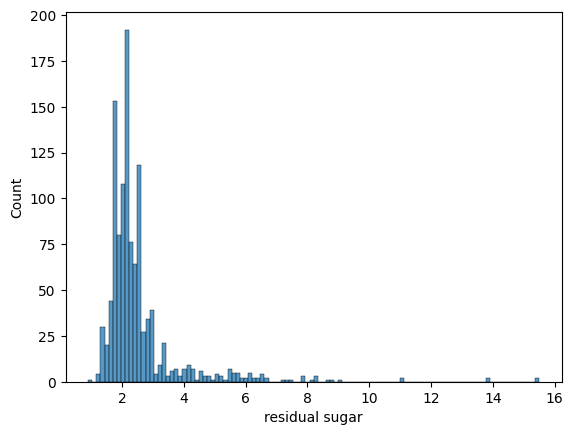

In [8]:
sns.histplot(x="residual sugar",data=df)

<Axes: ylabel='residual sugar'>

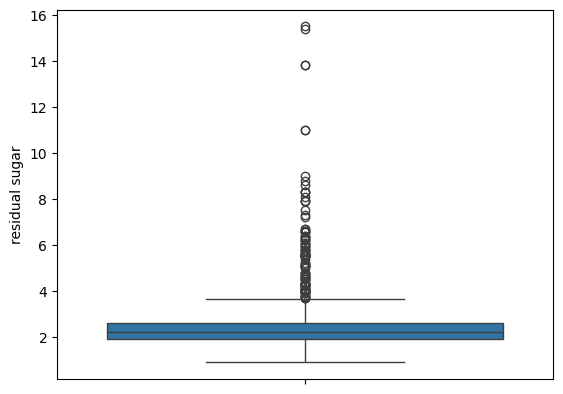

In [9]:
sns.boxplot(df['residual sugar'])

### Method 1: Z-Score Method
we calculate Mean + 3*SD for upper limit
and Mean -3*SD for lower limit

In [10]:
upper_limit=df['residual sugar'].mean()+3*df['residual sugar'].std()
lower_limit=df['residual sugar'].mean()-3*df['residual sugar'].std()
print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

upper limit  6.599904631019168
lower limit  -1.5356001690769112


In [11]:
#values lying outside this range are outliner
outliners=df.loc[(df['residual sugar']>upper_limit )| (df['residual sugar']<lower_limit)]
print(outliners)
len(outliners)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
114             7.4             0.600         0.26             7.3      0.070   
115             7.3             0.590         0.26             7.2      0.070   
230            10.0             0.490         0.20            11.0      0.071   
231            10.0             0.490         0.20            11.0      0.071   
275             6.6             0.735         0.02             7.9      0.122   
278             6.6             0.735         0.02             7.9      0.122   
287             9.9             0.400         0.53             6.7      0.097   
289             8.6             0.725         0.24             6.6      0.117   
339            10.6             0.280         0.39            15.5      0.069   
348             6.5             0.390         0.23             8.3      0.051   
424             8.9             0.595         0.41             7.9      0.086   
460             6.7         

23

In [12]:
#Trimming method to remove outliners
newdf=df.loc[(df['residual sugar']<=upper_limit) & (df['residual sugar']>lower_limit)]
print(len(newdf))

1120


<Axes: ylabel='residual sugar'>

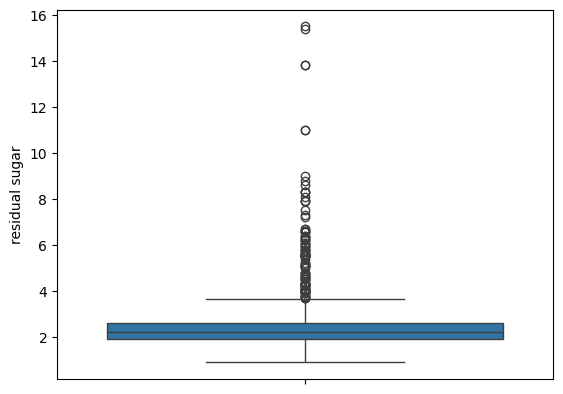

In [13]:
sns.boxplot(df['residual sugar'])

## IQR =Q3-Q1
upperlimit=1.5*IQR+Q3
lowerlimit=Q1-1.5*IQR

## InterQuartile Range(IQR method)

In [14]:
q1=df['residual sugar'].quantile(0.25)
q3=df['residual sugar'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

1.9 2.6 0.7000000000000002


In [15]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr


In [16]:
new_df=df.loc[(df['residual sugar']<=upper_limit)& (df['residual sugar']>=lower_limit)]
print(len(new_df))

1033


<Axes: ylabel='residual sugar'>

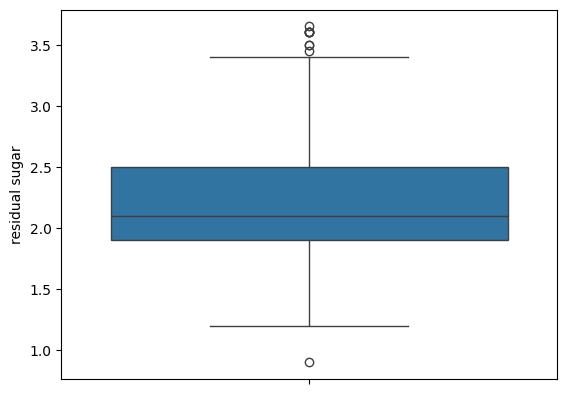

In [17]:
sns.boxplot(new_df['residual sugar'])

## Percentile Method  
In this method,we consider data between 1% and 99% and any data point lying beyond these points will be considered as outlier

In [22]:
q3=df['residual sugar'].quantile(0.9)
q1=df['residual sugar'].quantile(0.1)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [24]:
# newdf=df.loc[(df['residual sugar']<=upper_limit) & (df['residual sugar']>lower_limit)]
# sns.boxplot(newdf['residual sugar'])
newdf=df.copy()
newdf.loc[newdf['residual sugar']>=upper_limit,' residual sugar']=upper_limit
newdf.loc[newdf['residual sugar']<=lower_limit,'residual sugar']=lower_limit
newdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,residual sugar
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,NaN
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,NaN
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,NaN
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,NaN
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,NaN
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,NaN
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,NaN
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,NaN


<Axes: ylabel='residual sugar'>

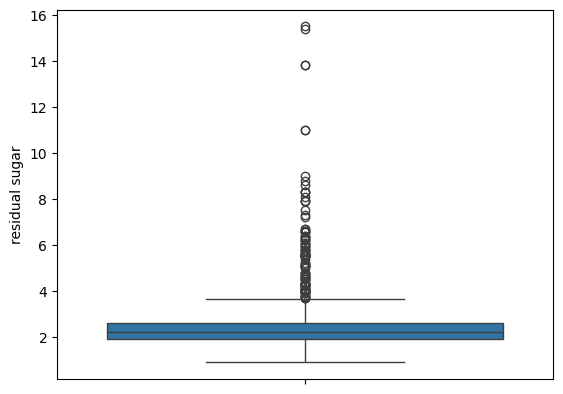

In [25]:
sns.boxplot(newdf['residual sugar'])